## Chapter 8 - Projecting into the future



### Objectives



-   Create projections of future growth
-   Compare projections to demographic projections
-   Extrapolate observed changes in growth rate
-   Improve projections using a fitted function



### Projection vs. prediction



What's the difference between a 'projection' and a 'prediction'?
> Prediction/: implies an expectation that this is what will happen with
> some uncertainty expressed in the *accuracy* of our prediction.
> 
> *Projection:* if this model is a good model for the system, and if
> nothing in the future causes the system parameters to change, this is
> what would happen.What are the assumptions for the quadratic model?
> - Population growth is limited by the availability of resources.
> - As carrying capacity K is approached, birth rates fall and death
>   rates rise.Can we estimate carrying capacity based on actual population growth?
> Not for world population because the net growth rate has not begun to
> fall (and it never may, if the assumption is wrong).Are resource limitations the primary reason why net growth has slowed?
> - Unlikely because death rate is not increasting but declining.
> - Net growth decrease must be due to the declining birth rate.
> - Relationship of resources vs. birth rate is the opposite: as
>   resources increase, nations become wealthier, birth rates fall.The behavior of the model is not conclusive if the mechanism is
unknown. It may also be that carrying capacity is the wrong parameter.

Here is s list that ChatGPT came up with for reasons why net growth
might have slowed (OpenAI's ChatGPT, personal communication, November
9, 2023):
> The net growth in world population might slow due to a variety of factors, including:
> 
> 1. Declining Fertility Rates: As countries develop, fertility rates
>    often decrease due to a combination of factors including increased
>    access to education, employment opportunities for women, and family
>    planning resources.
> 
> 2. Aging Populations: Many countries are experiencing an increase in
>    the median age of their populations due to lower birth rates and
>    higher life expectancies. An older population has a lower
>    proportion of individuals in reproductive age, leading to fewer
>    births.
> 
> 3. Urbanization: Urban living is often associated with lifestyle
>    choices that lead to smaller family sizes. This is due to factors
>    such as higher living costs, space limitations, and different
>    family planning attitudes.
> 
> 4. Increased Education: Higher levels of education, especially among
>    women, correlate with lower fertility rates. Educated women tend to
>    have children later and have fewer children overall.
> 
> 5. Economic Factors: Economic uncertainty and the desire for higher
>    living standards can lead to individuals or couples deciding to
>    have fewer children.
> 
> 6. Access to Contraceptives: Improved access to and education about
>    contraceptives allows people to better control the number and
>    spacing of their children.
> 
> 7. Government Policies: Some countries have implemented policies that
>    encourage smaller family sizes, such as China's former one-child
>    policy.
> 
> 8. Shifts in Values and Attitudes: Cultural shifts might prioritize
>    personal freedom, career development, and other life goals over or
>    in addition to raising a family.
> 
> 9. Environmental Concerns: Awareness of the environmental impact of
>    population growth may influence some people's decisions to have
>    fewer children.
> 
> 10. Health Issues: Global health issues, including pandemics, can have
>     a direct impact on population growth rates due to increased
>     mortality and the potential for reduced birth rates.
> 
> 11. Delayed Childbearing: Many individuals are choosing to delay
>     having children until later in life, which can lead to a natural
>     decrease in fertility and thus fewer children.
> 
> 12. Marriage Rates: Declining marriage rates in many societies can
>     contribute to lower fertility rates, as married couples are
>     statistically more likely to have children than single
>     individuals.
> 
> These factors can vary significantly by region and are influenced by a complex interplay of social, economic, and political forces.



### Generating projections



Setup - model, simulation and growth function:



In [1]:
<<population_model_setup>>
<<run_simulation_growth_function>>
<<quadratic_growth_function>>
<<show_session_variables_and_functions>>

Initialize the system:



In [1]:
from modsim import System
system = System(t_0 = t_0,
                p_0 = p_0,
                alpha = 25/1000,
                beta = -1.8/1000,
                t_end = 2100)
print(system)

System(t_0=1950, p_0=2.557628654, alpha=0.025, beta=-0.0018, t_end=2100)

Generate projection and print the last few results:



In [1]:
results = run_simulation(system, growth_func_quad)
print(results.tail())

Time
2096    12.462519
2097    12.494516
2098    12.525875
2099    12.556607
2100    12.586719
Name: Quantity, dtype: float64

Plot the `results`:



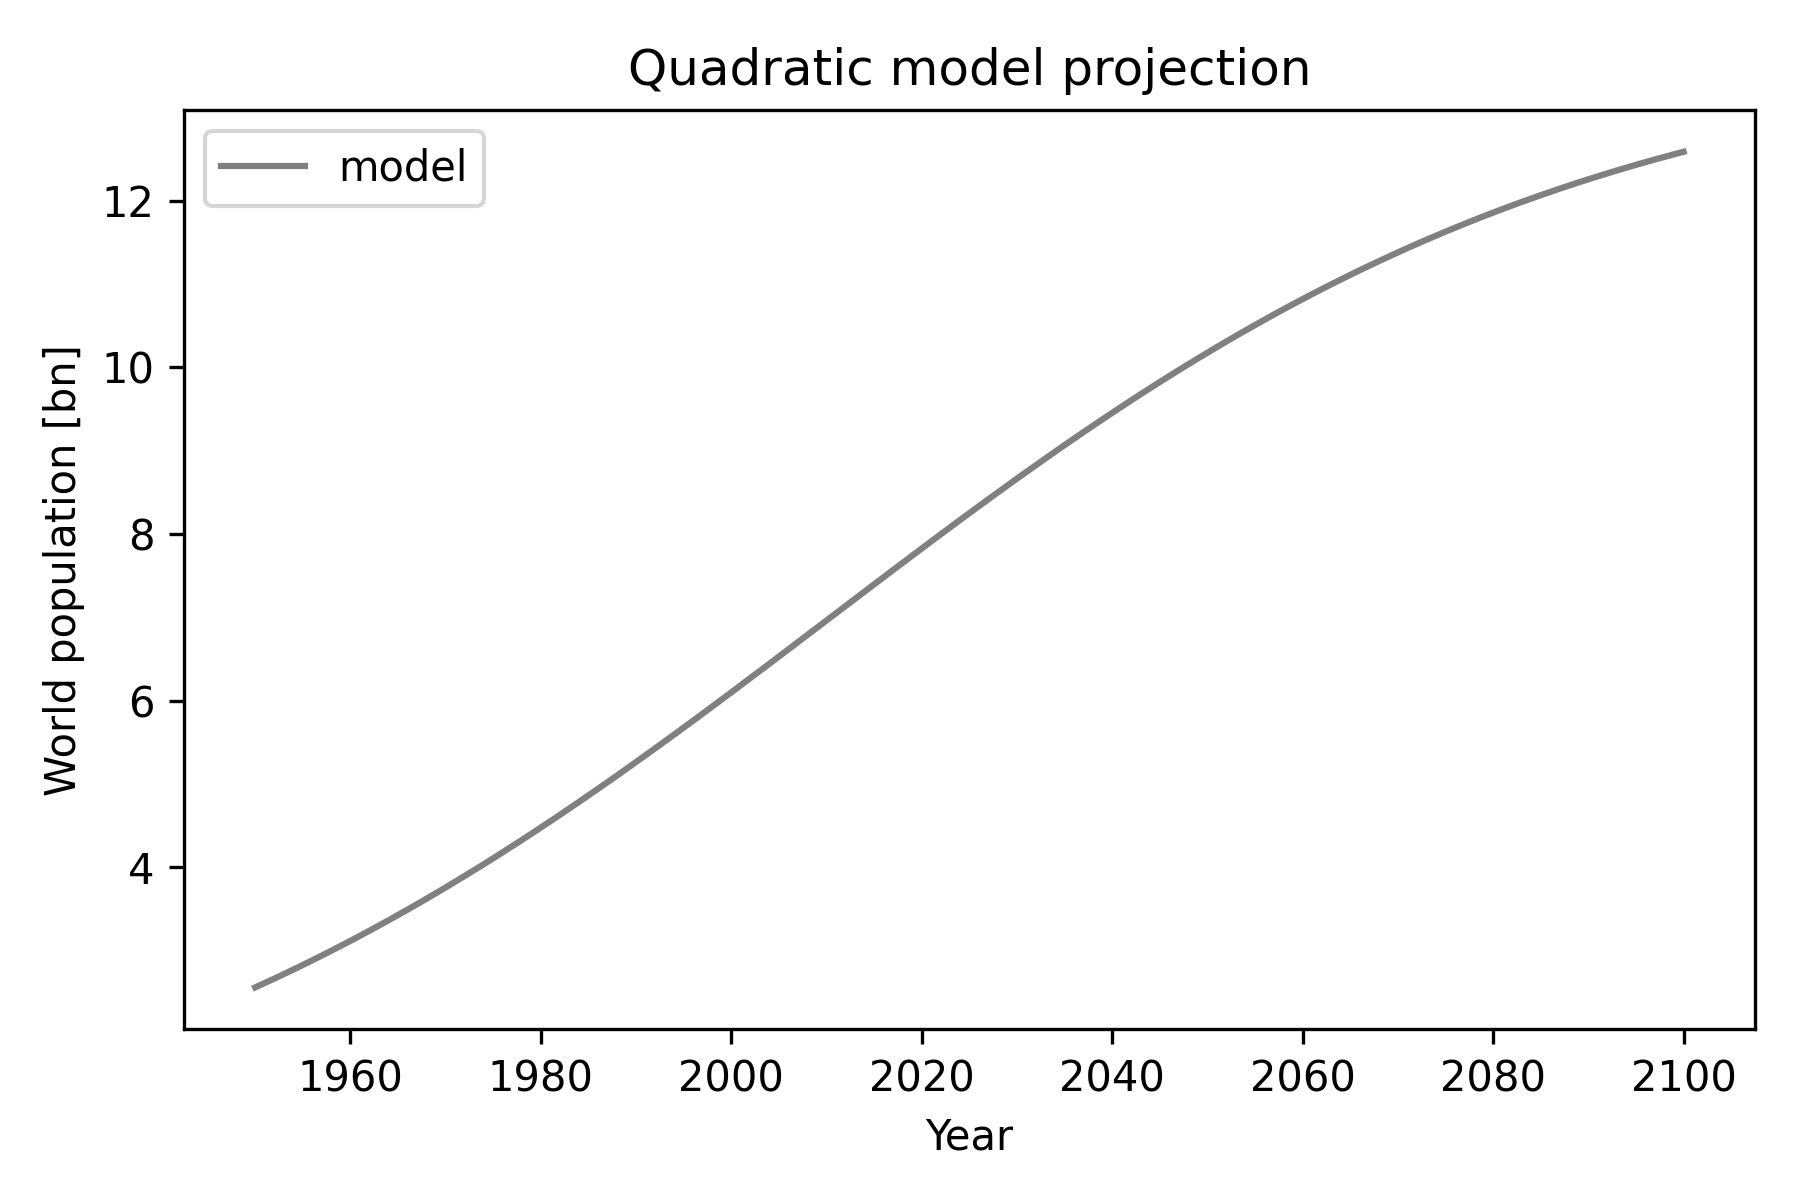

In [1]:
import matplotlib.pyplot as plt
from modsim import decorate

plt.clf()
results.plot(color='gray', label='model')
decorate(xlabel='Year',ylabel='World population [bn]',title='Quadratic model projection')
plt.savefig('img/results5.png')

### Comparing projections



Read table 3 from the Wikipedia HTML page stored in `tables`:



In [1]:
table3 = tables[3]

Column names are long. Replace them as before and print the first
few records:



In [1]:
table3.columns = ['census','prb','un']
print(table3.head())

census  prb            un
Year                                 
2016  7.334772e+09  NaN  7.432663e+09
2017  7.412779e+09  NaN           NaN
2018  7.490428e+09  NaN           NaN
2019  7.567403e+09  NaN           NaN
2020  7.643402e+09  NaN  7.758157e+09

Some values are `NaN`, i.e. missing. When plotting the projections from
the US Census and UN DESA with `plot`, we use `pd.DataFrame.dropna` ([doc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)):



In [1]:
def plot_projections(table):
    '''Plot world population projections.

    table: DataFrame with columns 'un' and 'census'
    '''
    # extract columns and transform values
    census_proj = table.census.dropna() / 1e9
    un_proj = table.un.dropna() / 1e9

    # plot projections
    census_proj.plot(style=':', label='US Census')
    un_proj.plot(style='--', label='UN DESA')

    # customize plot
    decorate(xlabel='Year',ylabel='World population [bn]')

Plot the professional projections with our own projections:



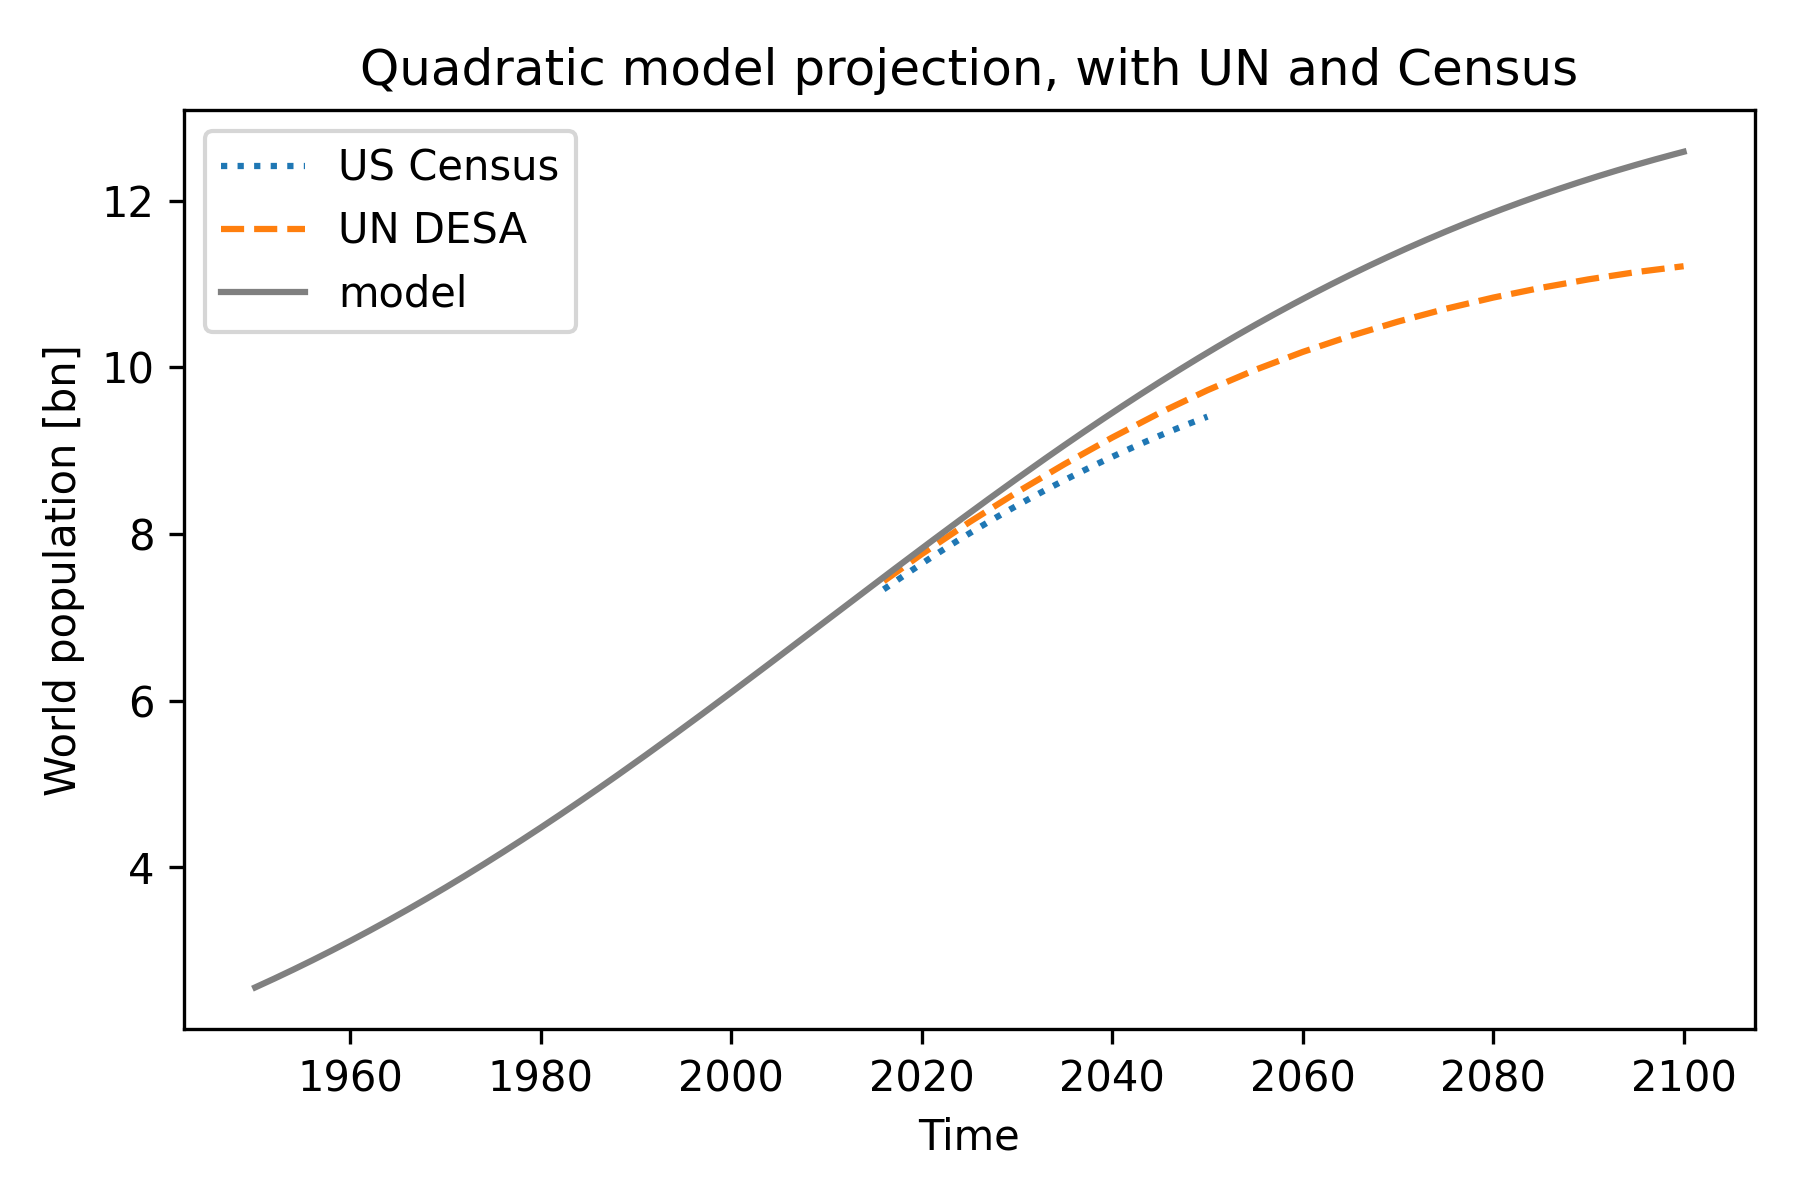

In [1]:
from modsim import decorate
import matplotlib.pyplot as plt
plt.clf()
plot_projections(table3)
results.plot(color='gray',label='model')
decorate(title='Quadratic model projection, with UN and Census')
plt.savefig('img/proj.png')

UN DESA projections go until 2100, and expect world population to
level off after ca. 11 bn. The US Census projections are a little
lower and only go until 2050.

